In [126]:
# We need some python libaries (tools) which we typicall load in the beginning of our script

# importing numpy as np
import numpy as np
# importing pyplot as plt
import matplotlib.pyplot as plt
# improrting pandas
import pandas as pd

# importing tool to display tables
from itables import init_notebook_mode, show
init_notebook_mode(all_interactive=False)

<IPython.core.display.Javascript object>

In [127]:
# Simulate some daily temperature data using a random number generator 

# First we have to set some paramters
years = 50 #number of years
size = 365 * years #total size of the dataset
pos = 15 #mean annual temperature
scale = 5 # standard deviation of daily temperature for simulating annual temp distribution 

# With only two statistical moments we can generate random numbers using a normal distribution
data_1 = np.random.normal(pos, scale, size)

# same for a second temperature distribution 
pos = 16.5# mean annual temperature
scale = 5 # standard deviation of daily temperature for simulating annual temp distribution 
data_2 = np.random.normal(pos, scale, size)

In [128]:
# Store data in a dataframe
df = pd.DataFrame({'day': range(1,data.size+1) , 'temperature 1': data_1, 'temperature 2': data_2})
# Print dataframe as table 
show(df)

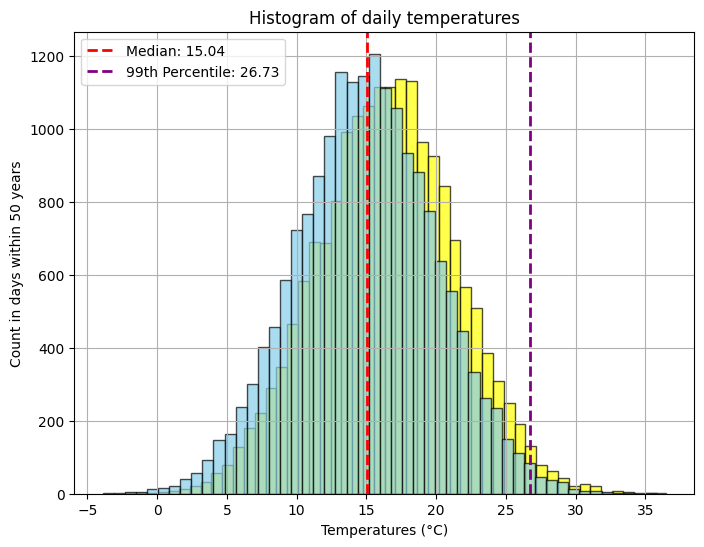

In [129]:
# Calculate some statistical moments
mean_temp = np.mean(df['temperature 1']) #mean
percentile_99 = np.percentile(df['temperature 1'],99) #99% percentile

# Plot the Histogram
plt.figure(figsize=(8, 6))
plt.hist(df['temperature 2'], bins=50, alpha=0.7, color='yellow', edgecolor='black')
plt.hist(df['temperature 1'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')

# Add lines for median, and percentiles
plt.axvline(mean_temp, color='red', linestyle='dashed', linewidth=2, label=f'Median: {mean_temp:.2f}')
plt.axvline(percentile_99, color='purple', linestyle='dashed', linewidth=2, label=f'99th Percentile: {percentile_99:.2f}')

# Plot legend, labels, and title
plt.legend()
plt.xlabel('Temperatures (°C)')
plt.ylabel('Count in days within ' + f'{years:} years')
plt.title('Histogram of daily temperatures')
plt.grid(True)
plt.show()

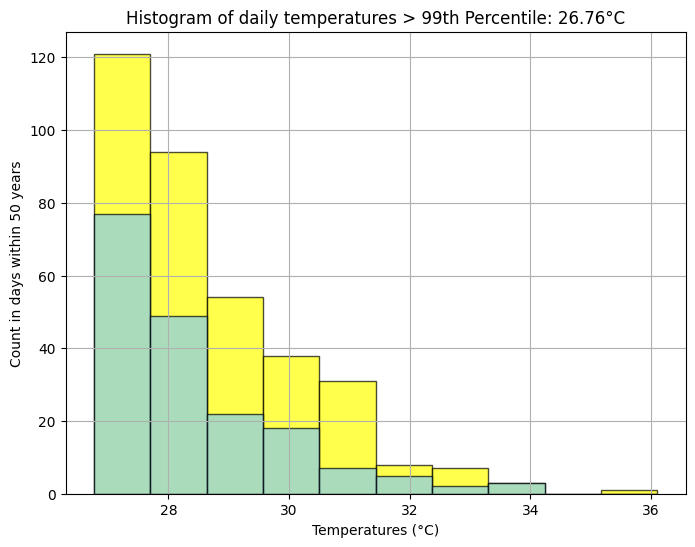

In [124]:
# Select only temperatures that are higher than 99% percentile
df_1=df['temperature 1'][df['temperature 1']>percentile_99]
df_2=df['temperature 2'][df['temperature 2']>percentile_99]

# Plot the Histogram of extremes
plt.figure(figsize=(8, 6))
# Determine bins based on the maximum and minimum values of both datasets
bins = np.histogram_bin_edges(np.concatenate([df_1, df_2]), bins=10)
plt.hist(df_2, bins=bins, alpha=0.7, color='yellow', edgecolor='black')
plt.hist(df_1, bins=bins, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Temperatures (°C)')
plt.ylabel('Count in days within ' + f'{years:} years')
plt.title('Histogram of daily temperatures > ' + f'99th Percentile: {percentile_99:.2f}°C')
plt.grid(True)
plt.show()

In [125]:
# Calaculate values for Probabiliy/Frequency and Intensity

#select from temperature distribution 1
count_1 = np.sum(df['temperature 1']>percentile_99)
dd_1 = np.sum(df['temperature 1'][df['temperature 1']>percentile_99])

frequency = count_1 / years #e.g count per year 
intensity = dd_1 / years #e.g. degree days or sum of precipitation

# Print out results of temperature distribution 1
print( f'The frequency of extreme temperatures > {percentile_99:.2f}°C is: {frequency:.2f} per year')
print( f'The intensity of extreme temperatures > {percentile_99:.2f}°C is: {intensity:.2f} degree days per year')

count_2 = np.sum(df['temperature 2']>percentile_99)
dd_2 = np.sum(df['temperature 2'][df['temperature 2']>percentile_99])


#select from temperature distribution 2
frequency = count_2 / years #e.g count per year 
intensity = dd_2 / years #e.g. degree days or sum of precipitation

# Print out results of temperature distribution 2
print( f'The frequency of extreme temperatures > {percentile_99:.2f}°C is: {frequency:.2f} per year')
print( f'The intensity of extreme temperatures > {percentile_99:.2f}°C is: {intensity:.2f} degree days per year')

The frequency of extreme temperatures > 26.76°C is: 3.66 per year
The intensity of extreme temperatures > 26.76°C is: 103.80 degree days per year
The frequency of extreme temperatures > 26.76°C is: 7.14 per year
The intensity of extreme temperatures > 26.76°C is: 204.53 degree days per year
